# 1. 集成学习

In [6]:
from sklearn import datasets
import matplotlib.pyplot as plt
x,y = datasets.make_moons(n_samples=500,noise=0.3,random_state=42)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 666)
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])

In [7]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression()
log_clf.fit(x_train,y_train)
log_clf.score(x_test,y_test)

d:\software\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.824

In [8]:
from sklearn.svm import SVC
svc_clf = SVC()
svc_clf.fit(x_train,y_train)
svc_clf.score(x_test,y_test)

d:\software\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.88

In [9]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth=5,min_samples_leaf=10)
dt_clf.fit(x_train,y_train)
dt_clf.score(x_test,y_test)

0.8

In [10]:
y_predict1 = log_clf.predict(x_test)
y_predict2 = svc_clf.predict(x_test)
y_predict3 = dt_clf.predict(x_test)

In [11]:
import numpy as np
y_predict = np.array((y_predict1+y_predict2+y_predict3)>=2,dtype = 'int')

In [12]:
y_predict[:10]

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 1])

In [13]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_predict,y_test)

In [14]:
score

0.888

### Voting Classifier

In [15]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[
    ('log_clf',LogisticRegression()),
    ('svm_clf',SVC()),
    ('dt_clf',DecisionTreeClassifier())
],voting='hard')

In [16]:
voting_clf.fit(x_train,y_train)
voting_clf.score(x_test,y_test)

d:\software\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\software\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.88

# 2. Soft Voting

### 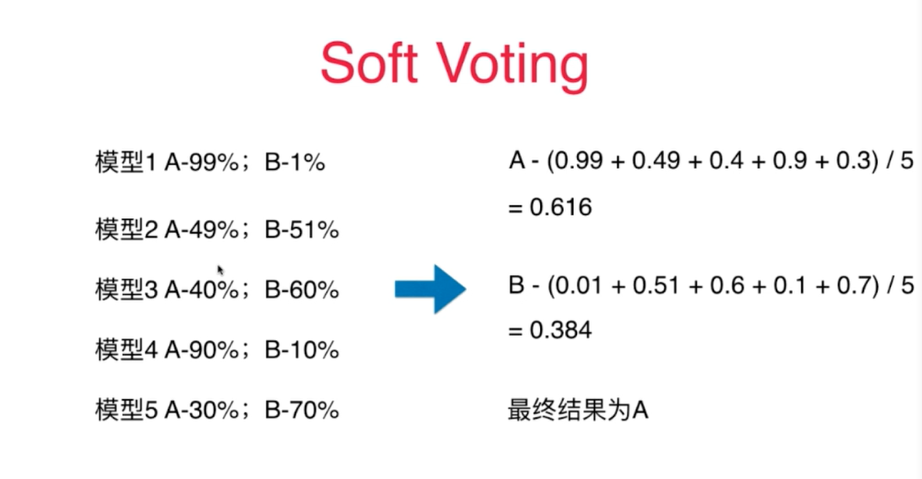

In [17]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[
    ('log_clf',LogisticRegression()),
    ('svm_clf',SVC(probability = True)),
    ('dt_clf',DecisionTreeClassifier())
],voting='soft')

In [18]:
voting_clf.fit(x_train,y_train)
voting_clf.score(x_test,y_test)

d:\software\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\software\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.856

# 3. 集成学习，大数定理

### 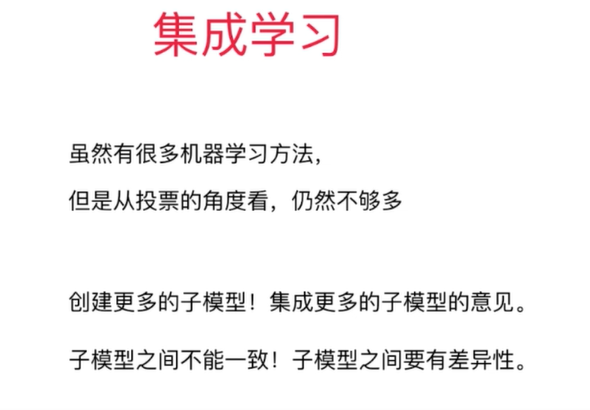

### 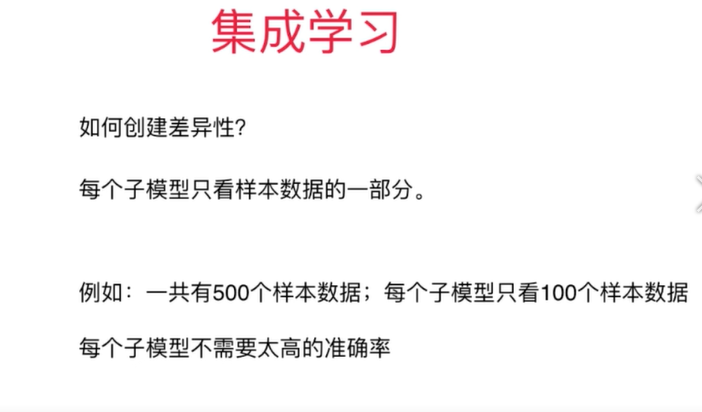

### 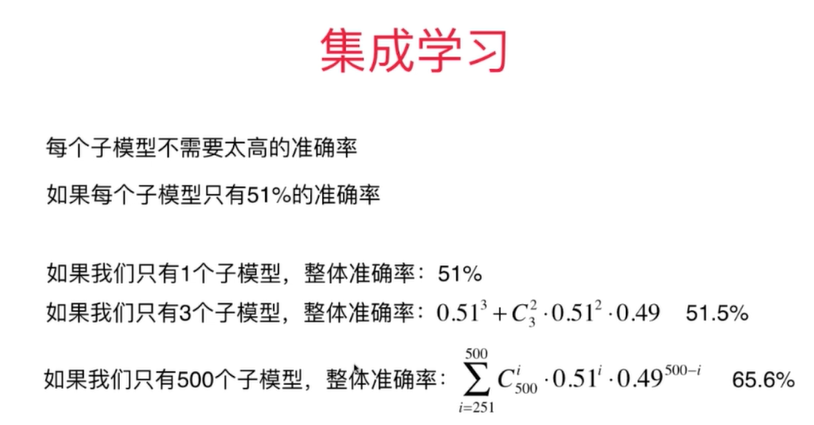

### 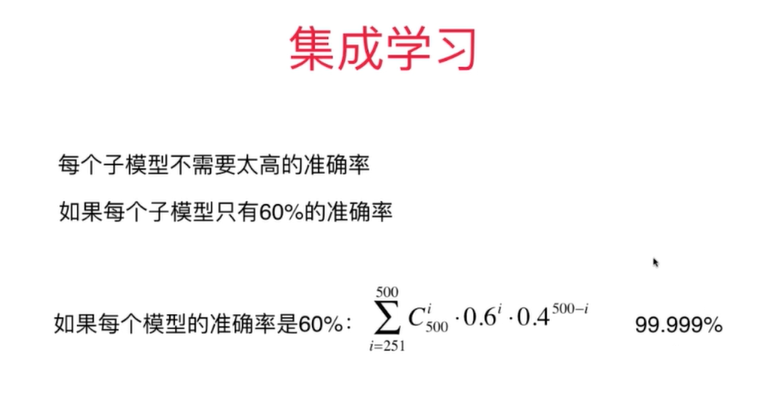

### 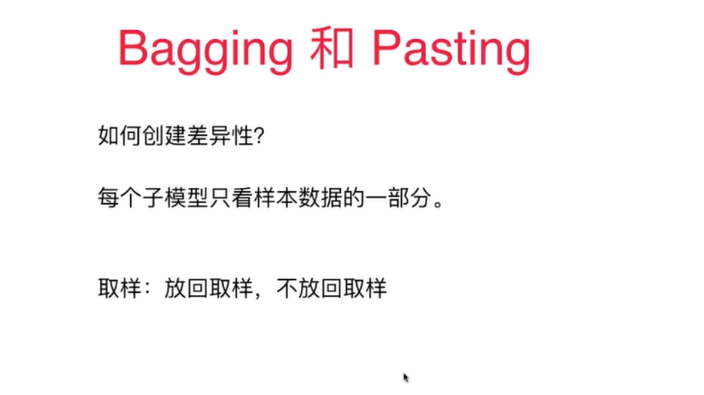

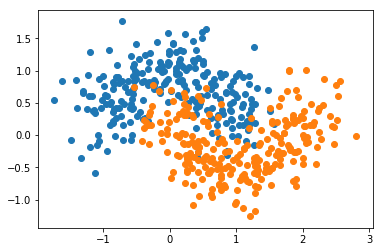

In [19]:
from sklearn import datasets
import matplotlib.pyplot as plt
x,y = datasets.make_moons(n_samples=500,noise=0.3,random_state=42)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 666)
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])

## Bagging

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                               n_estimators=500,max_samples=100,
                               bootstrap=True)

In [21]:
bagging_clf.fit(x_train,y_train)
bagging_clf.score(x_test,y_test)

0.872

# 3.oob 和更多的Bagging 相关

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [23]:
X ,y = datasets.make_moons(n_samples=500,noise=0.3, random_state=42)

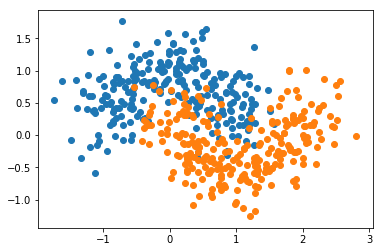

In [24]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

In [25]:
%%time
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                               n_estimators=1000,max_samples=100,
                               bootstrap=True,oob_score=True)
bagging_clf.fit(X,y)

Wall time: 812 ms


In [26]:
bagging_clf.oob_score_

0.92

In [27]:
%%time
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                               n_estimators=1000,max_samples=100,
                               bootstrap=True,oob_score=True,n_jobs=-1)
bagging_clf.fit(X,y)

Wall time: 1.87 s


### 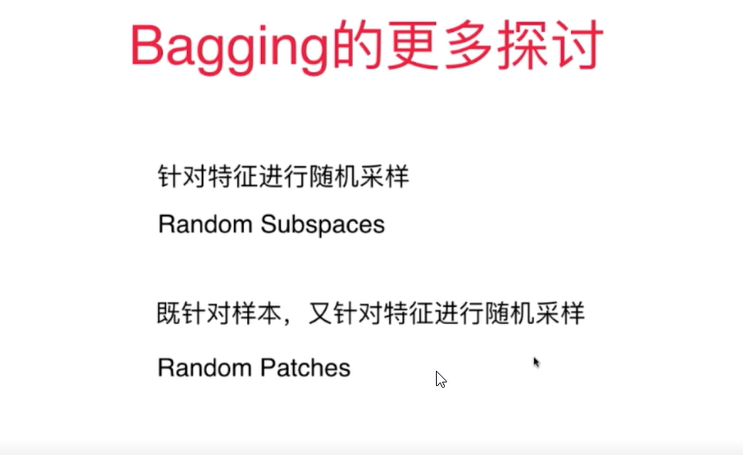

### bootstrap_features 和 random Patches

In [28]:
bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                               n_estimators=1000,max_samples=100,
                               bootstrap=True,oob_score=True,n_jobs=-1,
                               max_features=1,bootstrap_features=True)
bagging_clf.fit(X,y)
bagging_clf.oob_score_

0.854

# 4. 随机森林

### 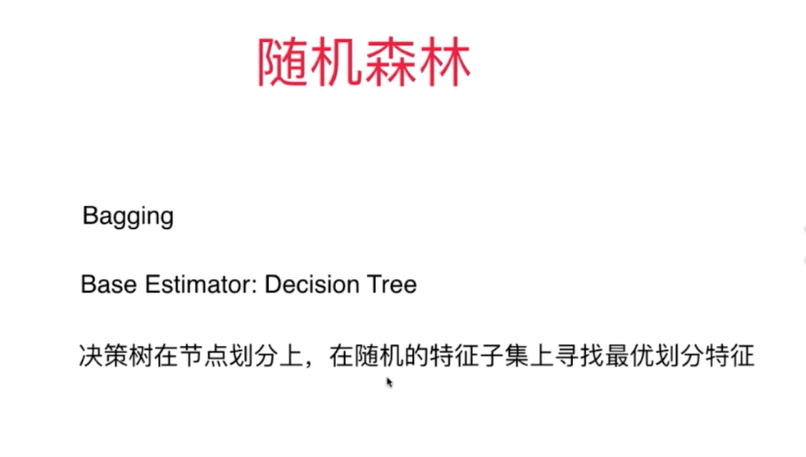

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=500,random_state=666,
                               oob_score=True,n_jobs=-1)

In [41]:
rf_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=True, random_state=666, verbose=0, warm_start=False)

In [39]:
rf_clf.fit(X,y)
rf_clf.oob_score_

0.896

In [40]:
rf_clf = RandomForestClassifier(n_estimators=500,max_leaf_nodes=16,random_state=666,
                               oob_score=True,n_jobs=-1)
rf_clf.fit(X,y)
rf_clf.oob_score_

0.92

### Extra_trees

### 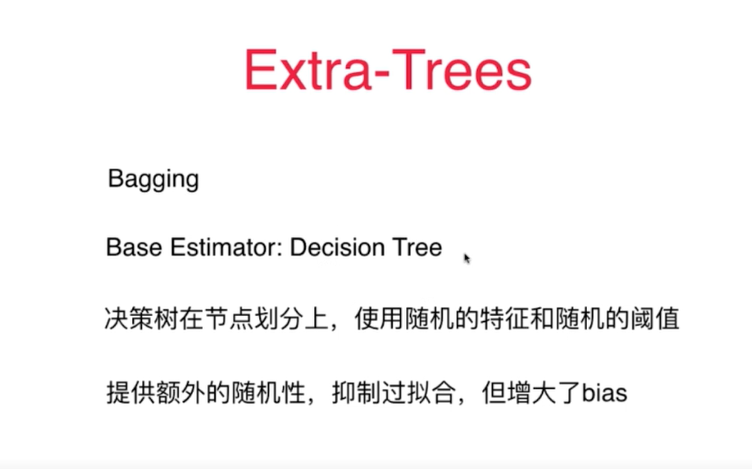

In [32]:
from sklearn.ensemble import ExtraTreesClassifier
rf_clf = ExtraTreesClassifier(n_estimators=500,bootstrap=True,random_state=666,
                               oob_score=True,n_jobs=-1)

In [33]:
rf_clf.fit(X,y)
rf_clf.oob_score_

0.892

## 集成学习解决回归的问题

In [34]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier

# 5. Boosting 

### 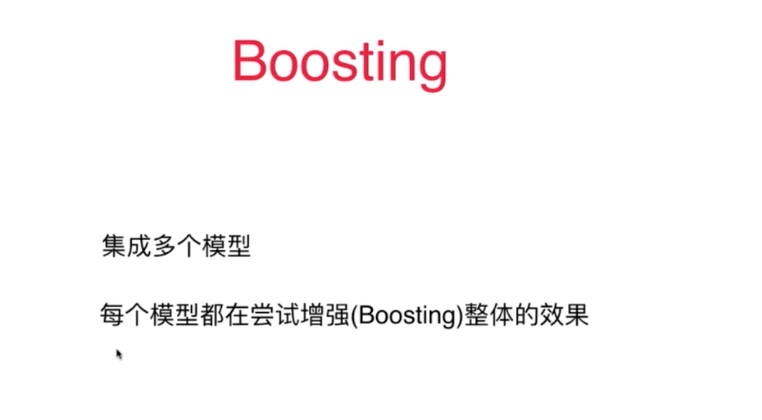

### 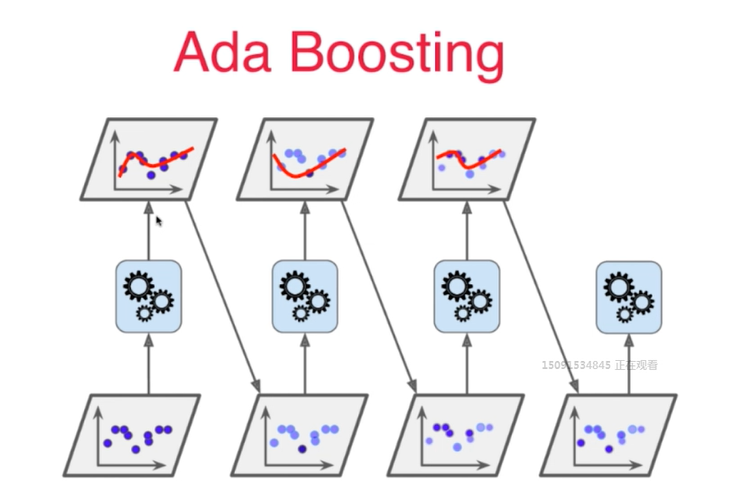

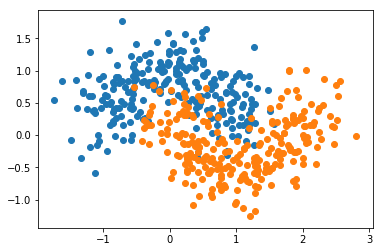

In [35]:
from sklearn import datasets
import matplotlib.pyplot as plt
x,y = datasets.make_moons(n_samples=500,noise=0.3,random_state=42)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 666)
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])

In [36]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),
                            n_estimators=500)
ada_clf.fit(x_train,y_train)
ada_clf.score(x_test,y_test)

0.848

## 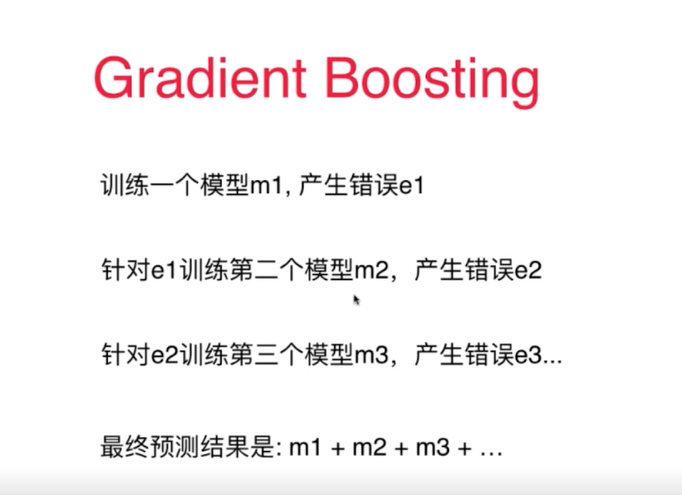

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(max_depth=2,n_estimators=30)
gb_clf.fit(x_train,y_train)
gb_clf.score(x_test,y_test)

0.848